In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df

# Data Cleansing

In [ ]:
df.columns = ['customer_id','gender','age','annual_income','spending_score']
df.set_index('customer_id',inplace=True)
df

# Exploratory Data Analysis

In [ ]:
df['gender'].value_counts()

In [ ]:
sns.pairplot(data = df,hue='gender')

# Algoritma K-Means

K-Means adalah algoritma pengelompokan data dengan melihat kemiripan nilai dalam suatu wilayah.  
Asumsi utama dari K-Means adalah suatu kelompok adalah sekumpulan data yang berdekatan.  
K-means memiliki 1 parameter utama yaitu K = Jumlah Kluster.  

Step melakukan K-Means di Python :
1. Lakukan standardisasi terhadap data
2. Tentukan jumlah kluster
3. Gunakan algoritma K-Means terhadap data
4. Lakukan Analisis dengan hasil kluster

# Ilustrasi cara kerja K-Means

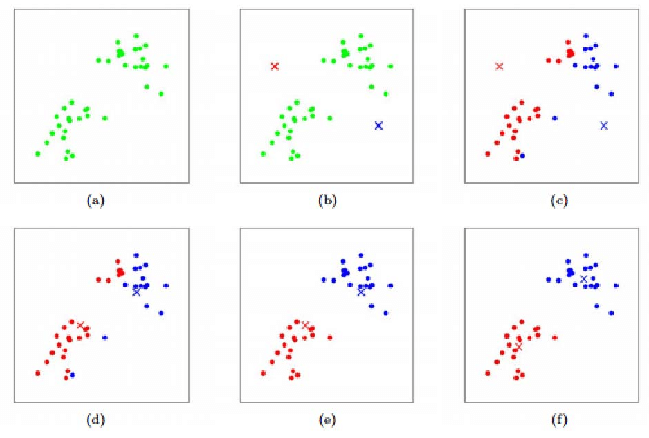

# 1. Apa itu standardisasi?

Scaling adalah transformasi agar data berada dalam suatu skala.  
Standardisasi adalah scaling agar data memiliki rataan = 0 dan variansi = 1.

Berikut rumus dari standardisasi

$$X_{baru} = \frac{X_{lama} - mean(X)}{std(X)}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
cols = ['age','annual_income','spending_score']

scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(df[cols])

In [ ]:
df[cols]

In [ ]:
df_scaled

In [ ]:
df_scaled.plot(x='age',y='annual_income',kind='scatter')

## Kenapa perlu di standardisasi?

K-Means adalah algoritma yang menggunakan jarak antar titik sebagai patokan.  

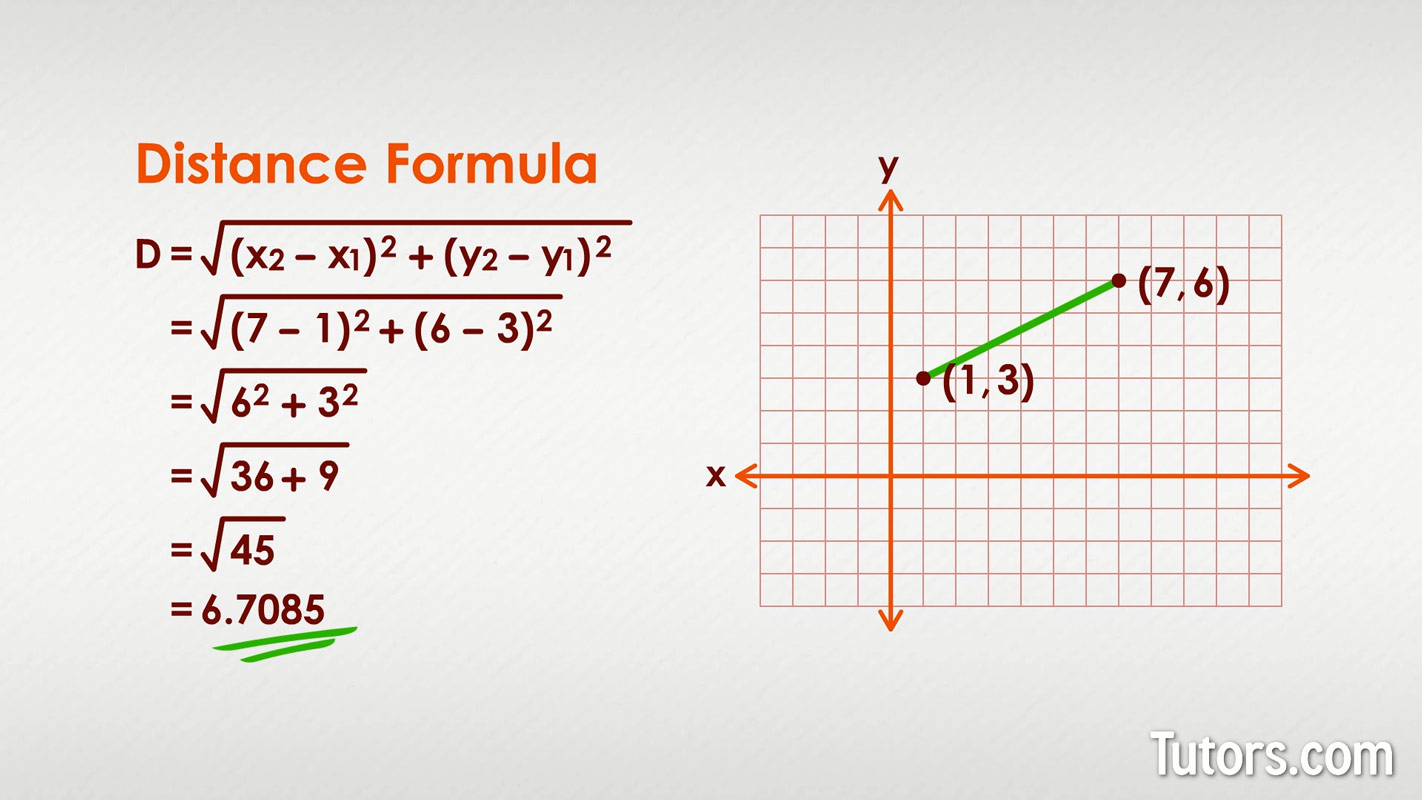

In [ ]:
df['annual_income_in_dollars'] = df['annual_income']*1000

fig,ax = plt.subplots(1,2,figsize=(12,4))

df.plot(x='age',y='annual_income',kind='scatter',ax=ax[0])
ax[0].axis('equal')

df.plot(x='age',y='annual_income_in_dollars',kind='scatter',ax=ax[1])
ax[1].axis('equal')

## Contoh kasus kenapa harus standardisasi :
Pasangan A : 
- Umur 35 dan Penghasilan 100k
- Umur 70 dan Penghasilan 100k

atau
Pasangan B:
- Umur 35 dan Penghasilan 100k
- Umur 35 dan Penghasilan 101k

Pasangan A, jarak 2D nya adalah 35
Pasangan B, jarak 2D nya adalah 1000

Berdasarkan jaraknya, pasangan B 28.5 lebih jauh daripada pasangan A

# 2. Lakukan K-Means

dokumentasi : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters = 5,n_init='auto')
model.fit(df_scaled)

In [ ]:
model.labels_

In [ ]:
df['cluster'] = model.labels_

In [ ]:
df

# 3. Analisis data hasil cluster

In [ ]:
df.groupby(['cluster']).mean()

# 4. Bagaimana jika ragu menentukan cluster?
1. Dengan bisnis : Ada berapa banyak kluster yang bisa diberikan perlakuan khusus oleh stakeholder? Apakah ada target?
2. Dengan statistik : Jumlah kluster yang dipilih adalah cluster yang optimal. Titik yang mirip berada di 1 kluster dan yang tidak mirip berada di kluster yang berbeda.

# Elbow Method

Ide dari Elbow Method :
Fokus terhadap jarak anggota kluster ke pusat kluster (SSD = Sum Square Distance).

Misal M adalah titik cluster paling ideal.  
Maka jika kita membuat clustering Kmeans dengan M+1 kluster, SSD nya tidak bertambah baik.

Yang dicari :  
Jumlah kluster sehingga SSD tidak bertambah baik (minim improvement)

In [ ]:
list_sum_distance = []
for k in range(2,10):
    model= KMeans(n_clusters = k,n_init='auto')
    model.fit(df_scaled)
    inertia = model.inertia_ 
    list_sum_distance.append(inertia)

In [ ]:
plt.plot(range(2,10),list_sum_distance)

# Silhouette Score

Ide dari Silhouette Method :
Fokus terhadap jarak antar titik dalam suatu kluster dan jarak antar titik dalam kluster yang berbeda.

Segmentasi paling ideal adalah ketika jarak anggota dalam kluster seminimum mungkin dan jarak antar kluster yang berbeda semaksimum mungkin

dokumentasi : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
from sklearn.metrics import silhouette_score
list_silhouette = []
for k in range(2,10):
    model= KMeans(n_clusters = k,n_init='auto')
    model.fit(df_scaled)
    cluster = model.labels_
    score = silhouette_score(df_scaled,cluster)
    list_silhouette.append(score)

In [ ]:
plt.plot(range(2,10),list_silhouette)

Dari kedua metode, k = 6 adalah yang paling ideal secara data.

Kita jalankan ulang algoritma K-means dengan k =6

In [ ]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters = 6,n_init='auto')
model.fit(df_scaled)

df['cluster'] = model.labels_

display(df.groupby(['cluster']).mean())
display(df['cluster'].value_counts())

# Challenge

Kita dapat melakukan k-means dengan data bersifat categorical.  
Lakukan tahap-tahap berikut :  

In [ ]:
# Mulai dengan data ini
df = pd.read_csv('Mall_Customers.csv')
df.columns = ['customer_id','gender','age','annual_income','spending_score']
df.set_index('customer_id',inplace=True)
df

In [ ]:
# 1. Ubah variabel gender menjadi 0 untuk pria dan 1 untuk wanita. Proses ini disebut sebagai one-hot encoding


In [ ]:
# 2. Lakukan standard scaling untuk terhadap variabel gender + variabel lainnya


In [ ]:
# 3. Lakukan perhitungan K-Means dan Silhouette Method untuk mencari kluster terbaik 


In [ ]:
# 4. Lakukan analisis sederhana terhadap hasil kluster. Apakah muncul kluster berdasarkan jenis kelamin?